# Investigate Hotel Business using Data Visualization

In [1]:
import pandas as pd
import numpy as np

import seaborn as sb
import matplotlib.pyplot as plt

## Data Preprocessing

### Import Data

In [2]:
data = pd.read_csv('hotel_bookings_data.csv')
data.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
93700,City Hotel,0,0,2018,September,31,24,1,0,2,...,0,No Deposit,9.0,NaN,0,Personal,131.0,0,0,Check-Out
66884,City Hotel,1,156,2019,June,17,26,0,3,2,...,0,Non Refund,37.0,NaN,0,Personal,100.0,0,0,Canceled
24275,Resort Hotel,0,0,2018,July,20,13,0,2,2,...,0,No Deposit,NaN,NaN,0,Personal,85.0,1,0,Check-Out
21566,Resort Hotel,0,100,2018,April,9,26,2,5,2,...,0,No Deposit,6.0,NaN,0,Personal,26.0,0,0,Check-Out
80486,City Hotel,1,25,2017,February,50,8,0,2,1,...,0,Non Refund,19.0,NaN,0,Personal,90.0,0,0,Canceled


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Handling Missing Values

In [4]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [5]:
#Null value for 'children' is replaced with 0, assuming the customers don't have children

data['children'] = data['children'].fillna(0)
data['children'].isnull().sum()

0

In [6]:
#Null value for 'city' is replaced with mode

data['city'].value_counts()

Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64

In [7]:
data['city'] = data['city'].fillna('Kota Denpasar')
data['city'].isnull().sum()

0

In [13]:
#Column 'agent' is numerical, so the null values are filled with 0 (undefined value)

data['agent'] = data['agent'].fillna(0)
data['agent'].isnull().sum()

0

In [14]:
#Column 'company' has too many null data and not much information can be gotten. So, the column is dropped.

data.drop('company', axis = 1, inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Unsuitable Data

In [16]:
data['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

In [17]:
#In 'meal' column, there is 'Undefined' data which is unsuitable for this column.
#These data will be changed to 'Breakfast' instead

data['meal'] = data['meal'].replace('Undefined','Breakfast')

In [18]:
data['meal'].value_counts()

Breakfast     93479
Dinner        14463
No Meal       10650
Full Board      798
Name: meal, dtype: int64

In [19]:
#The total of guests in each booking should also be considered

data['total_guest'] = data['adults']+data['children']+data['babies']

In [20]:
data['total_guest'].value_counts()

2.0     82051
1.0     22581
3.0     10495
4.0      3929
0.0       180
5.0       137
26.0        5
12.0        2
27.0        2
20.0        2
10.0        2
40.0        1
50.0        1
55.0        1
6.0         1
Name: total_guest, dtype: int64

In [21]:
#Data with total guest = 0 and total guest more than 5 will be dropped

data = data[(data['total_guest'] != 0) & (data['total_guest'] <=5)]

In [22]:
data['total_guest'].value_counts()

2.0    82051
1.0    22581
3.0    10495
4.0     3929
5.0      137
Name: total_guest, dtype: int64

## Monthly Hotel Booking Analysis Based on Hotel Type

In [23]:
ins1 = data.groupby(['hotel','arrival_date_month']).agg({'hotel'             : ['count'],
                                                         'arrival_date_year' : ['nunique']}).reset_index()
ins1.columns = ['hotel type','month','total book','distinct year']
ins1['avg monthly book'] = round(ins1['total book']/ins1['distinct year'],0)
ins1

,hotel type,month,total book,distinct year,avg monthly book
0,City Hotel,April,4950,2,2475.0
1,City Hotel,August,7885,2,3942.0
2,City Hotel,December,7593,2,3796.0
3,City Hotel,February,4114,2,2057.0
4,City Hotel,January,4336,2,2168.0
5,City Hotel,July,8221,2,4110.0
6,City Hotel,June,7469,2,3734.0
7,City Hotel,March,3729,2,1864.0
8,City Hotel,May,6434,2,3217.0
9,City Hotel,November,7392,2,3696.0


In [24]:
from sort_dataframeby_monthorweek import *
ins1 = Sort_Dataframeby_Month(ins1 ,monthcolumnname='month')
ins1

,hotel type,month,total book,distinct year,avg monthly book
0,City Hotel,January,4336,2,2168.0
1,Resort Hotel,January,2435,2,1218.0
2,City Hotel,February,4114,2,2057.0
3,Resort Hotel,February,2645,2,1322.0
4,City Hotel,March,3729,2,1864.0
5,Resort Hotel,March,2191,2,1096.0
6,City Hotel,April,4950,2,2475.0
7,Resort Hotel,April,3102,2,1551.0
8,City Hotel,May,6434,2,3217.0
9,Resort Hotel,May,3334,2,1667.0


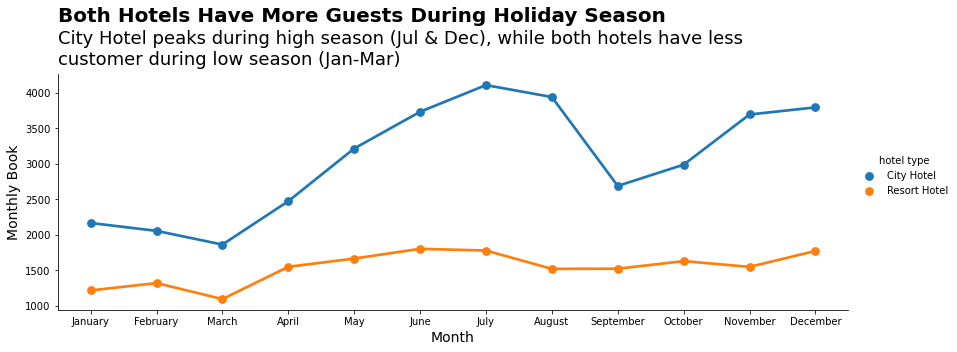

In [37]:
sb.catplot(data=ins1, x='month', y='avg monthly book', hue='hotel type', kind='point', height=4, aspect=3)

plt.text(x=-0.5, y=5000, s="Both Hotels Have More Guests During Holiday Season", 
         fontsize=20, fontweight='bold')
plt.text(x=-0.5, y=4400, s="City Hotel peaks during high season (Jul & Dec), while both hotels have less \ncustomer during low season (Jan-Mar)", 
         fontsize=18)
plt.xlabel('Month', size= 14)
plt.ylabel('Monthly Book', size=14)
plt.show()

## Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [26]:
#Stay duration is the sum of customer stays during weekend nights and weekday nights

data['stay_duration'] = data['stays_in_weekend_nights']+data['stays_in_weekdays_nights']

In [27]:
data['stay_duration'].value_counts()

2     27630
3     27061
1     21005
4     17371
7      8639
5      7771
6      3846
8      1155
10     1135
14      912
9       840
0       645
11      393
12      220
13      141
15       72
21       71
16       40
25       37
18       35
28       34
19       22
17       20
20       14
22       13
29       13
30       13
23        8
26        6
24        6
35        5
42        4
27        4
33        3
56        2
38        1
48        1
46        1
45        1
69        1
60        1
34        1
Name: stay_duration, dtype: int64

In [29]:
#Each row will be labeled based on their stay duration

data['stay_label'] = np.where(data['stay_duration'] > 21, 21, 
                              np.where(data['stay_duration'] > 14, 15, data['stay_duration']))

In [30]:
ins2 = data.groupby(['hotel','stay_label']).agg({'is_canceled' : ['sum'],
                                                 'hotel'       : ['count']}).reset_index()
ins2.columns=['hotel type','stay_label','canceled_book','total_book']
ins2['%_canceled_book'] = round(ins2['canceled_book']/ins2['total_book']*100,2)
ins2

,hotel type,stay_label,canceled_book,total_book,%_canceled_book
0,City Hotel,0,13,264,4.92
1,City Hotel,1,4103,13258,30.95
2,City Hotel,2,10432,21414,48.72
3,City Hotel,3,9482,21370,44.37
4,City Hotel,4,4853,12547,38.68
5,City Hotel,5,1775,4985,35.61
6,City Hotel,6,938,2049,45.78
7,City Hotel,7,808,2053,39.36
8,City Hotel,8,176,381,46.19
9,City Hotel,9,93,212,43.87


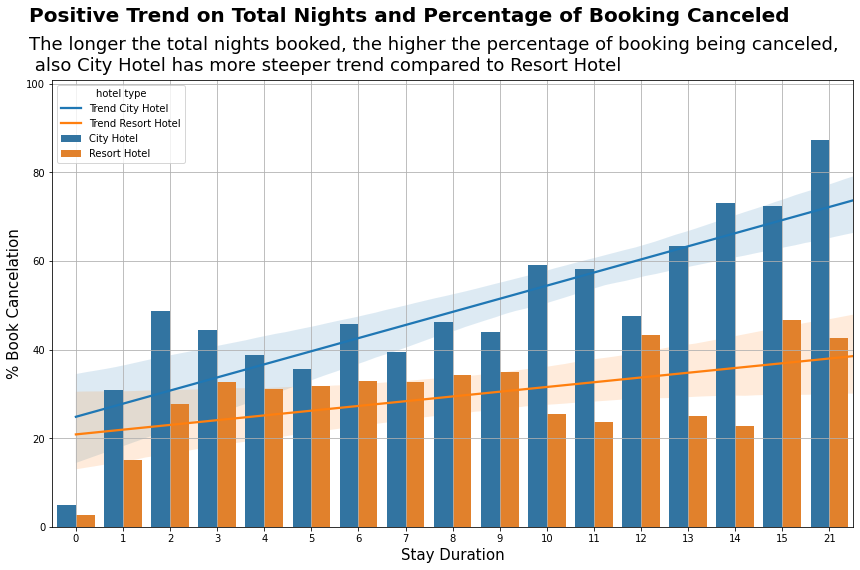

In [74]:
plt.figure(figsize=(13,8))
sb.regplot(x='stay_label', y='%_canceled_book', data=ins2[ins2['hotel type'] == 'City Hotel'], scatter=False, label='Trend City Hotel')
sb.regplot(x='stay_label', y='%_canceled_book', data=ins2[ins2['hotel type'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel')
sb.barplot(x='stay_label',y='%_canceled_book',data=ins2, hue='hotel type')

plt.grid()
plt.xlabel('Stay Duration', size= 15)
plt.ylabel('% Book Cancelation', size= 15)

plt.text(x=-1, y=114, s='Positive Trend on Total Nights and Percentage of Booking Canceled', 
         fontsize=20, fontweight='bold')
plt.text(x=-1, y=103, s='The longer the total nights booked, the higher the percentage of booking being canceled, \n also City Hotel has more steeper trend compared to Resort Hotel', 
         fontsize=18)

plt.tight_layout()
plt.show()

## Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [63]:
data['lead_time'].describe()

count    119193.000000
mean        104.083461
std         106.852181
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

In [64]:
#Since the median is 69 days, we choose to segment the lead time on base 30 days.
#Q3 is at 160, hence we choose to make segmentation until over 150 days.

data['lead_time_label'] = np.where(data['lead_time']<=30, '0-30 Days',
                                   np.where(data['lead_time']<=60, '31-60 Days',
                                            np.where(data['lead_time']<=90, '61-90 Days',
                                                     np.where(data['lead_time']<=120, '91-120 Days',
                                                              np.where(data['lead_time']<=150, '121-150 Days','Over 150 Days')))))

In [65]:
ins3 = data.groupby(['hotel','lead_time_label']).agg({'is_canceled' : ['sum'],
                                                      'hotel'       : ['count']}).reset_index()
ins3.columns=['hotel type','lead_time_label','canceled_book','total_book']
ins3['%_canceled_book'] = round(ins3['canceled_book']/ins3['total_book']*100,2)

In [66]:
list_lead = ['0-30 Days','31-60 Days','61-90 Days','91-120 Days','121-150 Days','Over 150 Days']
ins3['lead_time_label'] = pd.Categorical(ins3['lead_time_label'], categories=list_lead, ordered=True)
ins3.sort_values(by=['lead_time_label'])

,hotel type,lead_time_label,canceled_book,total_book,%_canceled_book
0,City Hotel,0-30 Days,5184,23243,22.30
6,Resort Hotel,0-30 Days,1984,15336,12.94
2,City Hotel,31-60 Days,4608,11873,38.81
8,Resort Hotel,31-60 Days,1565,5077,30.83
3,City Hotel,61-90 Days,3692,8902,41.47
9,Resort Hotel,61-90 Days,1275,3675,34.69
4,City Hotel,91-120 Days,3486,7442,46.84
10,Resort Hotel,91-120 Days,1159,2987,38.80
1,City Hotel,121-150 Days,2542,5606,45.34
7,Resort Hotel,121-150 Days,1032,2531,40.77


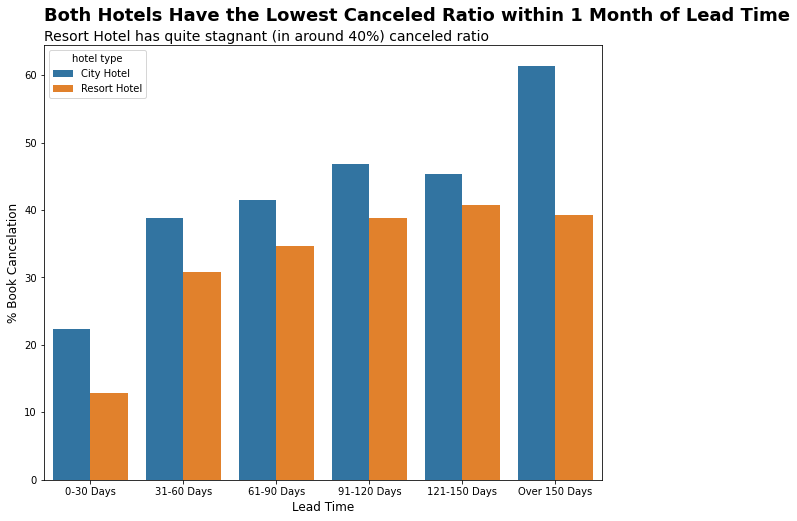

In [79]:
plt.figure(figsize=(10,8))
sb.barplot(x='lead_time_label',y='%_canceled_book',data=ins3, hue='hotel type')

plt.xlabel('Lead Time', size= 12)
plt.ylabel('% Book Cancelation', size= 12)

plt.text(x=-0.5, y=68, s='Both Hotels Have the Lowest Canceled Ratio within 1 Month of Lead Time', 
         fontsize=18, fontweight='bold')
plt.text(x=-0.5, y=65, s='Resort Hotel has quite stagnant (in around 40%) canceled ratio', 
         fontsize=14)

plt.show()